## Historical Earthquake Data Analysis using K-Means Clustering

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import folium
%matplotlib inline

In [17]:
earthquakes_filepath = "earthquakes.tsv"
data = pd.read_csv(earthquakes_filepath, sep = "\t")
data = data[1:]
data.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
1,NaN,1900.0,7.0,12.0,6.0,25.0,0.0,NaN,NaN,"TURKEY: KARS,KARAKURT,KAGIZMAN,DIGOR",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1900.0,10.0,29.0,9.0,11.0,0.0,1276.0,NaN,VENEZUELA: MACUTO,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,1901.0,3.0,31.0,7.0,11.0,NaN,NaN,NaN,"BULGARIA: BALCHIK, KAVARNA, BLATNITSA, LIMANU",...,NaN,NaN,50.0,1.0,NaN,NaN,1200.0,4.0,NaN,NaN
4,NaN,1901.0,3.0,31.0,7.0,12.0,NaN,3725.0,NaN,BULGARIA: BALCHIK,...,NaN,NaN,50.0,1.0,NaN,3.0,1200.0,4.0,NaN,NaN
5,NaN,1901.0,8.0,9.0,18.0,33.0,45.0,1282.0,NaN,JAPAN: OFF NORTHEAST COAST HONSHU,...,NaN,NaN,NaN,NaN,NaN,2.0,8.0,1.0,NaN,NaN


In [18]:
data.describe()

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Latitude,Longitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
count,1454.000000,1454.000000,1452.000000,1435.000000,1432.000000,1405.000000,290.000000,7.000000,1454.000000,1454.000000,...,28.000000,31.000000,882.000000,1002.000000,394.000000,1253.000000,4.660000e+02,729.000000,2.540000e+02,412.000000
mean,1980.241403,6.512380,16.044766,11.416725,28.935754,26.801993,2907.244828,3644.857143,20.620708,39.302103,...,1730.964286,1.709677,3504.212018,2.194611,2185.327731,2.515563,2.991390e+04,2.917695,9.968233e+04,2.888350
std,32.221791,3.399048,8.596639,7.100631,17.404227,18.660924,1503.717540,2213.388159,20.997073,78.118336,...,8190.135546,1.039024,32885.597515,1.122404,13391.419357,1.049474,2.583684e+05,1.065868,1.317520e+06,1.123585
min,1900.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1276.000000,585.000000,-54.000000,-178.252000,...,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000
25%,1960.000000,4.000000,9.000000,5.000000,14.000000,9.500000,1837.000000,2192.500000,5.500000,4.550000,...,3.750000,1.000000,20.000000,1.000000,5.000000,2.000000,1.305000e+02,2.000000,3.000000e+02,2.000000
50%,1987.000000,7.000000,16.000000,11.000000,28.000000,26.000000,2174.000000,4153.000000,27.748500,52.022000,...,19.000000,1.000000,92.000000,2.000000,41.000000,2.000000,8.260000e+02,3.000000,1.411500e+03,3.000000
75%,2007.000000,9.000000,23.000000,18.000000,44.000000,43.400000,3610.000000,4883.500000,37.600000,103.000000,...,153.500000,3.000000,383.500000,3.000000,500.000000,3.000000,5.679250e+03,4.000000,8.008500e+03,4.000000
max,2022.000000,12.000000,31.000000,23.000000,59.000000,59.900000,5861.000000,6624.000000,61.017000,178.291000,...,43476.000000,4.000000,799000.000000,4.000000,220136.600000,4.000000,5.360000e+06,4.000000,2.100000e+07,4.000000


---
### Visualizing coordinates on a scatter plot

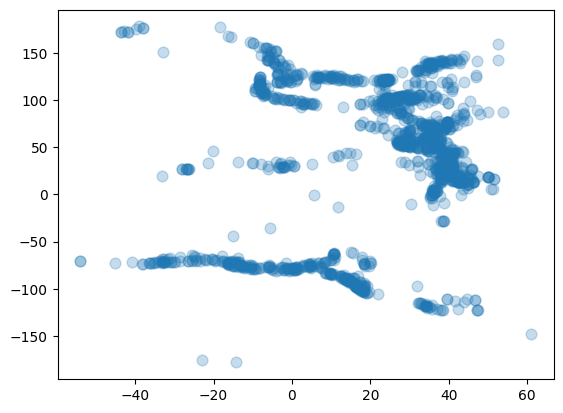

In [19]:
locations = np.array(data[["Latitude", "Longitude"]], dtype = np.float64)
plt.scatter(locations[:,0], locations[:,1], alpha = 0.25, s = 60)

Visually, there are roughly two distinct clusters.

In [21]:
kmc = KMeans(n_clusters = 2)
kmc.fit(locations)

KMeans(n_clusters=2)

In [26]:
predictions = kmc.predict(locations)
kmc.cluster_centers_

array([[  3.20831778, -82.66826531],
       [ 25.99645005,  76.95812151]])